In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

# Step 1 : Data Understanding, Preparation, and Pre-Processing :

In [2]:
# loading the dataset
df_churn = pd.read_csv("train.csv")

In [3]:
#reading the dataset
df_churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
#checking shape of dataset
df_churn.shape

(69999, 172)

In [5]:
#checking info of dataset
df_churn.info("show_counts=True")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [6]:
#checking null percentage of each feature in dataset
null_percentage_Of_Columns = df_churn.isnull().sum()/len(df_churn)*100
null_percentage_Of_Columns = null_percentage_Of_Columns[null_percentage_Of_Columns>0]
null_percentage_Of_Columns.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns

max_rech_data_6             74.902499
fb_user_6                   74.902499
date_of_last_rech_data_6    74.902499
av_rech_amt_data_6          74.902499
night_pck_user_6            74.902499
                              ...    
last_date_of_month_8         1.047158
std_og_t2o_mou               1.002871
loc_ic_t2o_mou               1.002871
loc_og_t2o_mou               1.002871
last_date_of_month_7         0.570008
Length: 125, dtype: float64

In [7]:
null_percentage_Of_Columns_60percent = null_percentage_Of_Columns[null_percentage_Of_Columns>60]
null_percentage_Of_Columns_60percent

max_rech_data_6             74.902499
fb_user_6                   74.902499
date_of_last_rech_data_6    74.902499
av_rech_amt_data_6          74.902499
night_pck_user_6            74.902499
count_rech_2g_6             74.902499
total_rech_data_6           74.902499
arpu_2g_6                   74.902499
count_rech_3g_6             74.902499
arpu_3g_6                   74.902499
arpu_3g_7                   74.478207
count_rech_2g_7             74.478207
av_rech_amt_data_7          74.478207
max_rech_data_7             74.478207
total_rech_data_7           74.478207
arpu_2g_7                   74.478207
date_of_last_rech_data_7    74.478207
night_pck_user_7            74.478207
fb_user_7                   74.478207
count_rech_3g_7             74.478207
total_rech_data_8           73.689624
max_rech_data_8             73.689624
date_of_last_rech_data_8    73.689624
count_rech_2g_8             73.689624
fb_user_8                   73.689624
arpu_3g_8                   73.689624
count_rech_3

In [8]:
for col in null_percentage_Of_Columns_60percent.index:
    df_churn.drop(col, axis=1, inplace=True)
    

In [9]:
#checking shape of dataset
df_churn.shape

(69999, 142)

In [10]:
df_churn = df_churn.dropna()

In [11]:
#checking shape of dataset
df_churn.shape

(61895, 142)

In [12]:
col_with_equal_values = []
for col in df_churn.columns:
    if (df_churn[col] == df_churn[col][0]).all():
        print("All values are equal in column", col)
        col_with_equal_values.append(col)

All values are equal in column circle_id
All values are equal in column loc_og_t2o_mou
All values are equal in column std_og_t2o_mou
All values are equal in column loc_ic_t2o_mou
All values are equal in column last_date_of_month_6
All values are equal in column last_date_of_month_7
All values are equal in column last_date_of_month_8
All values are equal in column std_og_t2c_mou_6
All values are equal in column std_og_t2c_mou_7
All values are equal in column std_og_t2c_mou_8
All values are equal in column std_ic_t2o_mou_6
All values are equal in column std_ic_t2o_mou_7
All values are equal in column std_ic_t2o_mou_8


In [13]:
col_with_equal_values

['circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_ic_t2o_mou_6',
 'std_ic_t2o_mou_7',
 'std_ic_t2o_mou_8']

In [14]:
for col in col_with_equal_values:
    df_churn.drop(col, axis=1, inplace=True)

In [15]:
#checking shape of dataset
df_churn.shape

(61895, 129)

In [16]:
#checking null percentage of each feature in dataset
null_percentage_Of_Columns = df_churn.isnull().sum()/len(df_churn)*100
null_percentage_Of_Columns = null_percentage_Of_Columns[null_percentage_Of_Columns>0]
null_percentage_Of_Columns.sort_values(inplace=True, ascending=False)
null_percentage_Of_Columns

Series([], dtype: float64)

In [17]:
df_churn.head(20)

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.00,0.00,0.00,0.00,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.00,0.00,0.0,0.00,65.09,204.99,1.01,0.00,0.00,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.00,0.00,0.00,7.46,27.58,15.18,11.84,53.04,40.56,0.00,0.0,0.66,0.00,0.00,0.00,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1958,0.00,0.00,0.00,0
1,1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.44,39.44,25.04,0.00,0.0,0.01,0.00,0.00,0.00,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,0.00,352.91,0.00,0.00,3.96,0.0,0,0,0,0,0,0,0,1,0,0,0,0,710,0.00,0.00,0.00,0
2,2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.00,0.00,0.0,0.00,28.94,84.99,0.00,0.00,0.00,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.00,0.00,0.00,29.91,2.48,6.38,124.29,33.83,36.64,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,6/11/2014,7/22/2014,8/24/2014,70,50,0,0.00,0.00,0.00,0.00,0.00,0.0,0,0,0,0,0,0,0,0,0,0,0,0,882,0.00,0.00,0.00,0
3,3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,0.00,0.00,0.00,0.00,1.63,6.99,3.94,0.00,37.91,44.89,23.63,0.00,0.00,0.00,0.00,0.00,8.03,44.91,48.84,23.63,0.26,12.06,0.00,15.33,25.93,4.60,0.56,0.0,0.00,16.16,37.99,4.60,0.00,0.00,0.0,14.95,9.13,25.61,0.00,0.0,0.0,76.03,95.98,53

In [18]:
df_churn.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.00000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000,61895.000000
mean,35034.549350,293.583717,296.110534,297.141384,134.059224,138.660389,135.000000,200.505383,204.031269,199.283881,9.726454,7.144846,7.146508,14.034237,9.975275,9.913633,48.145673,48.507250,47.397539,95.335901,94.909252,94.314578,3.800591,3.898549,3.743625,1.140742,1.374079,1.41912,147.289594,147.322611,145.463164,80.393881,86.168354,83.714672,87.698473,93.980331,89.951245,1.117867,1.100545,1.062159,169.212956,181.251965,174.730701,0.788111,0.803830,0.823694,3.968736,5.095854,5.087951,0.453640,0.025349,0.032233,321.720405,334.506369,326.144530,48.

In [19]:
numerical_columns = df_churn.select_dtypes(include=['int64','float'])
numerical_columns.columns

Index(['id', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'], dtype='object', length=126)

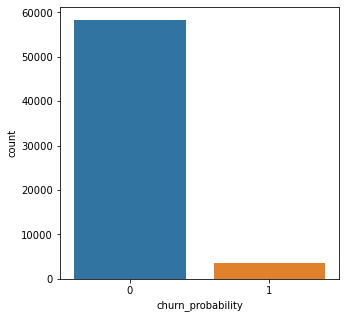

In [20]:
plt.figure(figsize=(5, 5))
sns.countplot(x=df_churn['churn_probability'])
plt.show()

In [21]:
df_churn["aon_group"] = pd.cut(df_churn["aon"],[0,180,365,730,1095,1825,2555,3285,4321], precision=0, labels=['0-0.5yr','0.5-1yr','1-2yr','2-3yr','3-5yr','5-7yr','7-9yr','9-12yr'])

<AxesSubplot:xlabel='aon_group'>

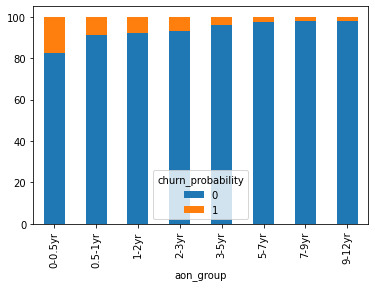

In [22]:
(df_churn.groupby('aon_group')['churn_probability'].value_counts(normalize=True).unstack('churn_probability')*100).plot.bar(stacked=True)

In [23]:
df_churn.corr()

,id,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
id,1.000000,0.001633,0.003585,0.003787,0.003467,0.007840,0.004802,-0.006720,-0.004526,-0.003148,0.003714,-0.000485,0.007682,-0.003437,-0.006258,0.001475,0.000565,0.005384,0.003353,0.004176,0.005635,0.005834,0.004720,0.001322,0.001166,-5.372005e-07,0.001421,-0.002963,0.003266,0.006989,0.005802,0.003667,0.006069,0.003442,-0.010083,-0.007909,-0.007295,0.001886,0.006891,0.002400,-0.004135,-0.001091,-0.002481,-0.001175,-0.000862,-0.000753,-0.000664,0.003309,-0.001679,-0.003879,-0.004514,0.001431,-0.001801,0.002743,0.000777,0.004994,0.005419,0.004643,0.001407,0.002439,0.002253,0.001482,0.002254,0.005323,0.003943,0.005073,0.004908,0.003340,0.007301,0.007888,0.002249,0.000673,0.000954,0.004977,0.009826,0.002473,0.004203,0.005471,0.004888,0.006956,0.007343,0.007336,0.004426,0.005735,-0.000915,0.008185,0.003634,0.005288,0.008040,0.003568,0.004584,0.000007,0.003023,-0.000668,0.001068,0.003642,0.002731,0.004885,0.006713,0.009196,0.000908,0.004771,0.003784,0.004958,-0.003759,0.002734,0.002831,0.003472,0.003914,-0.002382,0.001107,0.000514,-0.002929,-0.000367,0.001024,0.007637,0.003257,0.004525,0.000832,-0.000081,-0.001085,-0.001721,0.006352,0.003969,0.002321,-0.000646
arpu_6,0.001633,1.000000,0.798258,0.712005,0.453426,0.343045,0.287382,0.628694,0.483843,0.404398,0.127430,0.092504,0.093195,0.231183,0.180541,0.153025,0.237998,0.204780,0.189709,0.440782,0.376214,0.335088,0.192283,0.168452,0.158608,6.395151e-02,0.026686,0.022160,0.435674,0.372976,0.336277,0.366212,0.265116,0.212204,0.391270,0.282483,0.214812,0.088495,0.069600,0.060968,0.495415,0.358907,0.280389,0.410142,0.408254,0.396276,0.120529,0.069899,0.065020,0.047705,0.005647,0.004512,0.678657,0.523441,0.436286,0.108353,0.090945,0.089842,0.237655,0.203258,0.176498,0.067480,0.056587,0.054003,0.230049,0.195413,0.177434,0.100302,0.080328,0.069843,0.116197,0.083489,0.074120,0.037913,0.037170,0.028706,0.144662,0.108471,0.094395,0.267302,0.222567,0.200694,0.026458,-0.090117,-0.047310,0.080543,0.064565,0.063724,0.021179,0.032082,0.015910,0.499670,0.305530,0.231061,0.960600,0.778424,0.694677,0.460350,0.416707,0.368240,0.368277,0.344463,0.244556,0.089231,0.054838,0.042506,0.255673,0.206114,0.196466,0.103002,0.061887,0.051202,0.04

In [24]:
for col in numerical_columns.columns:
    q1 = df_churn[col].quantile(0.10)
    q3 = df_churn[col].quantile(0.90)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    #df_churn = df_churn.loc[(df_churn[col] > fence_low) & (df_churn[col] < fence_high)]

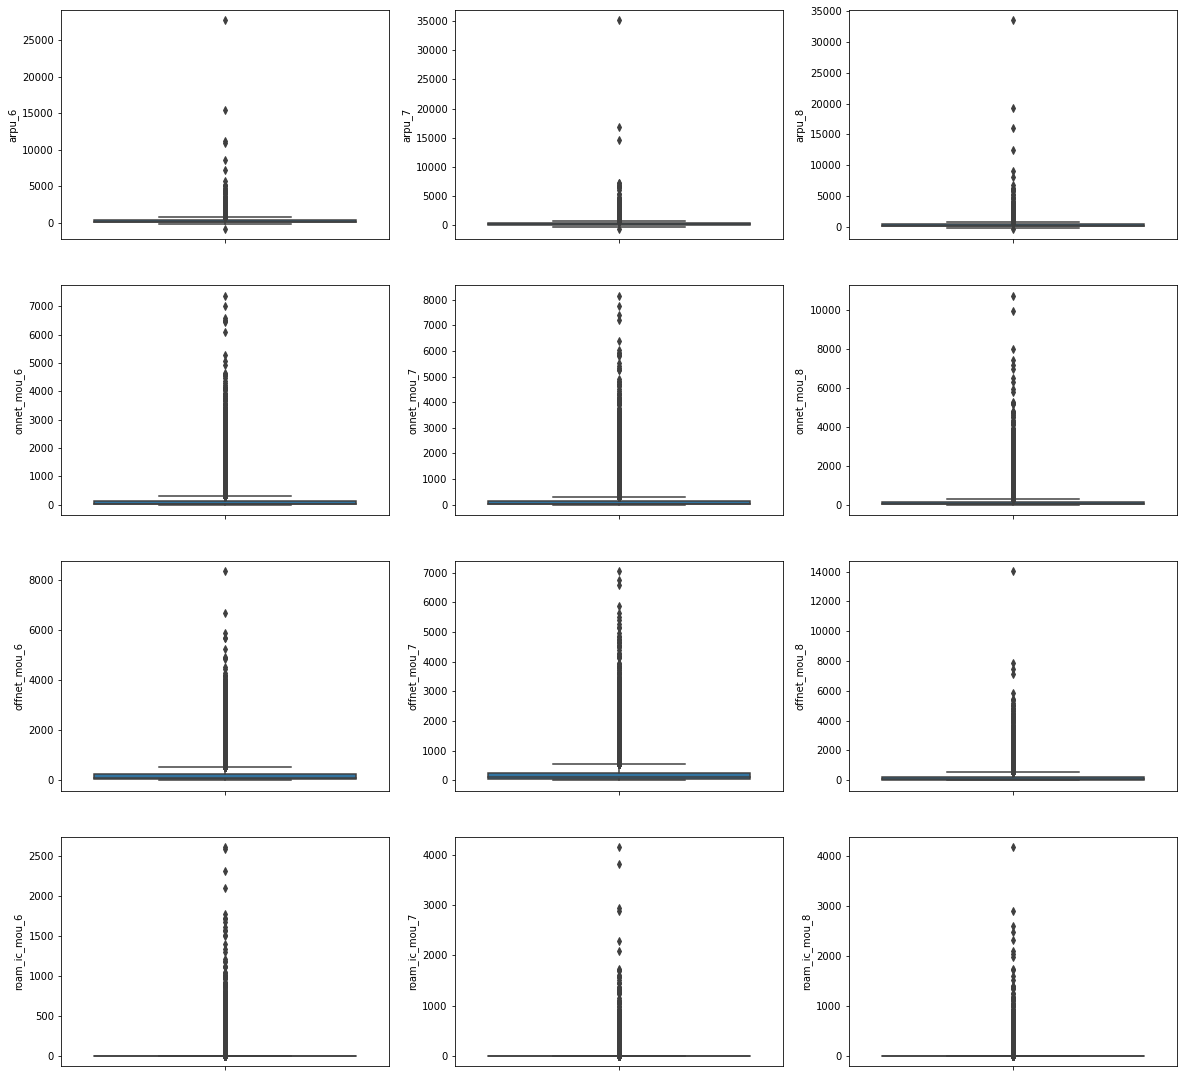

In [25]:
#Checking Outliesrs
plt.figure(figsize=(20, 60))
i=1
while i <=12:
    plt.subplot(12,3,i)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

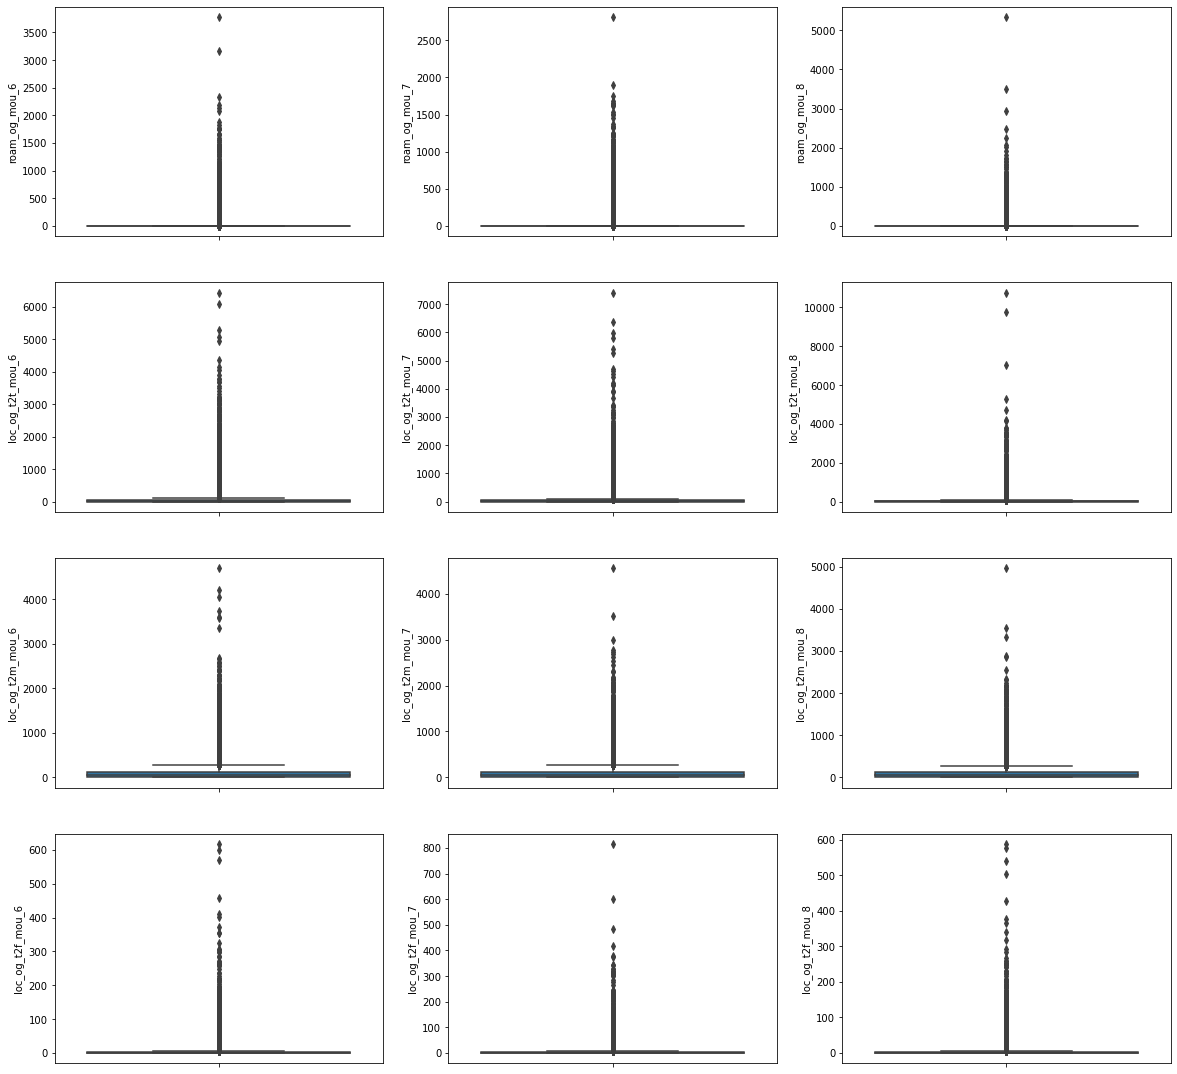

In [26]:
plt.figure(figsize=(20, 60))
i=13
while i <=24:
    plt.subplot(12,3,i-12)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

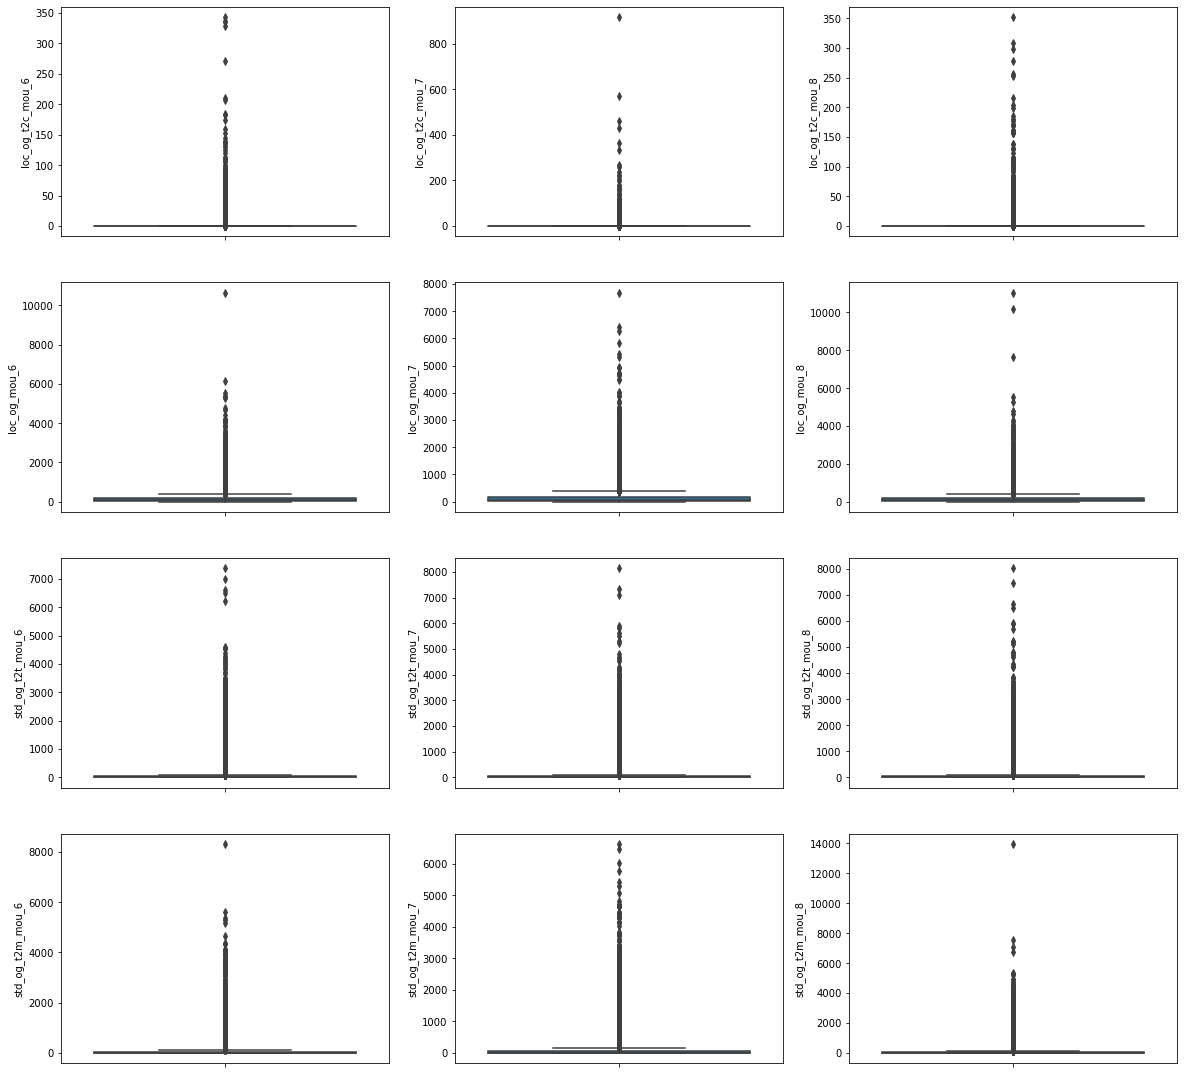

In [27]:
plt.figure(figsize=(20, 60))
i=25
while i <=36:
    plt.subplot(12,3,i-24)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

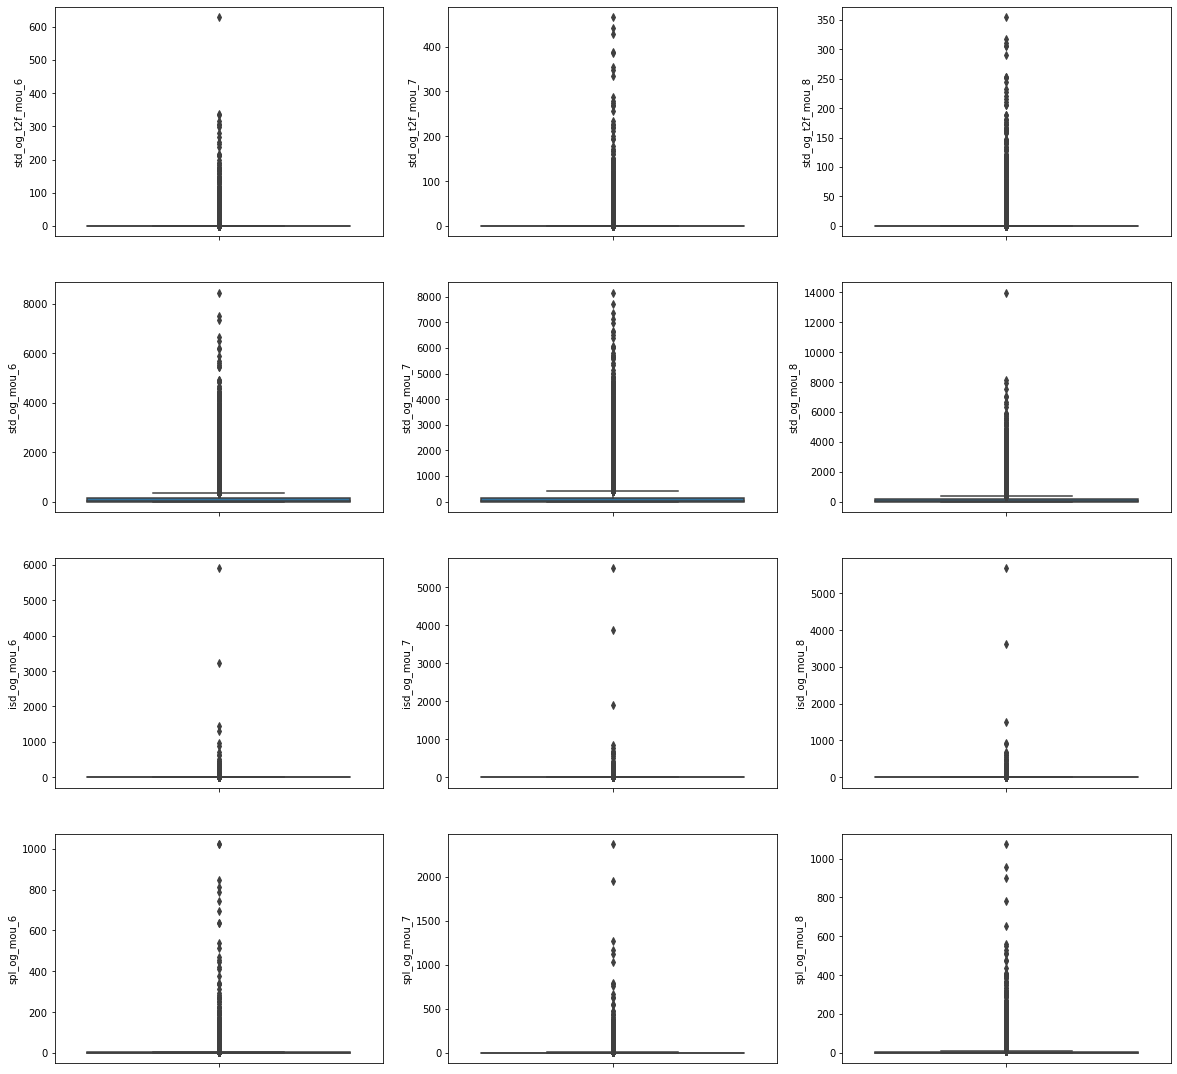

In [28]:
plt.figure(figsize=(20, 60))
i=37
while i <=48:
    plt.subplot(12,3,i-36)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

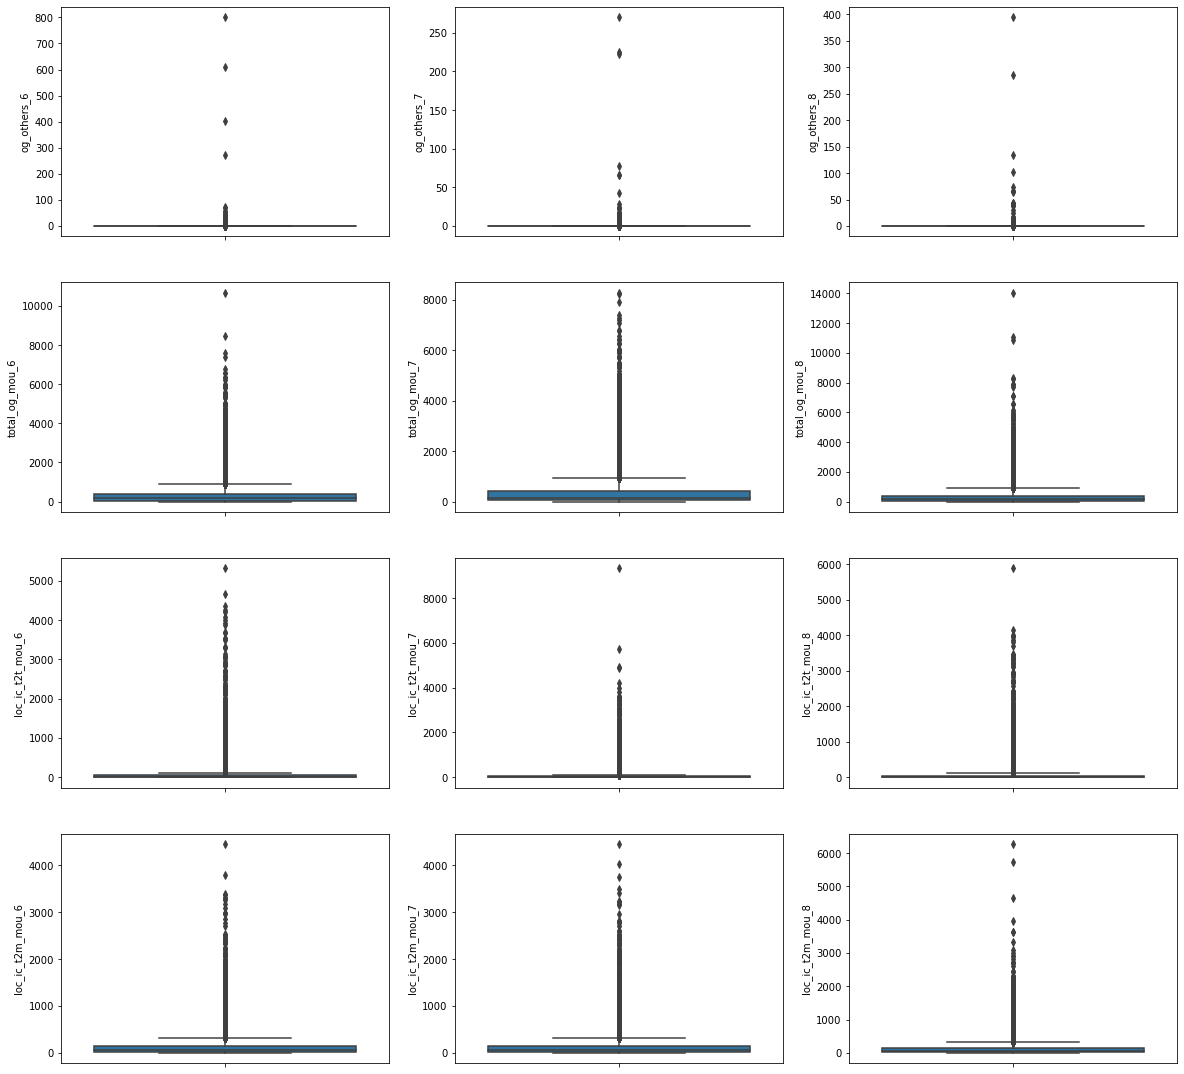

In [29]:
plt.figure(figsize=(20, 60))
i=49
while i <=60:
    plt.subplot(12,3,i-48)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

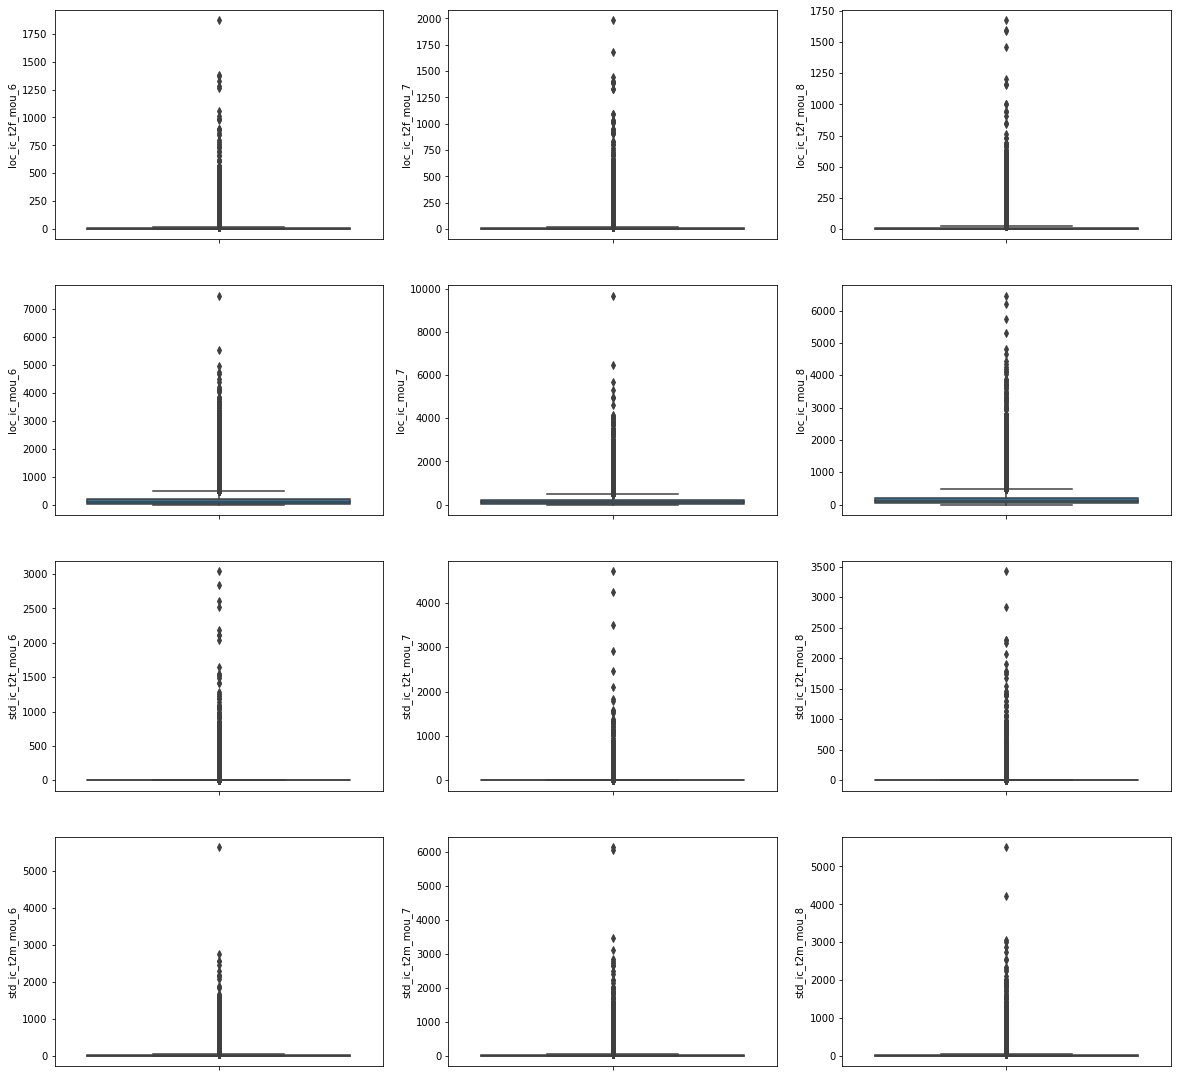

In [30]:
plt.figure(figsize=(20, 60))
i=61
while i <=72:
    plt.subplot(12,3,i-60)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

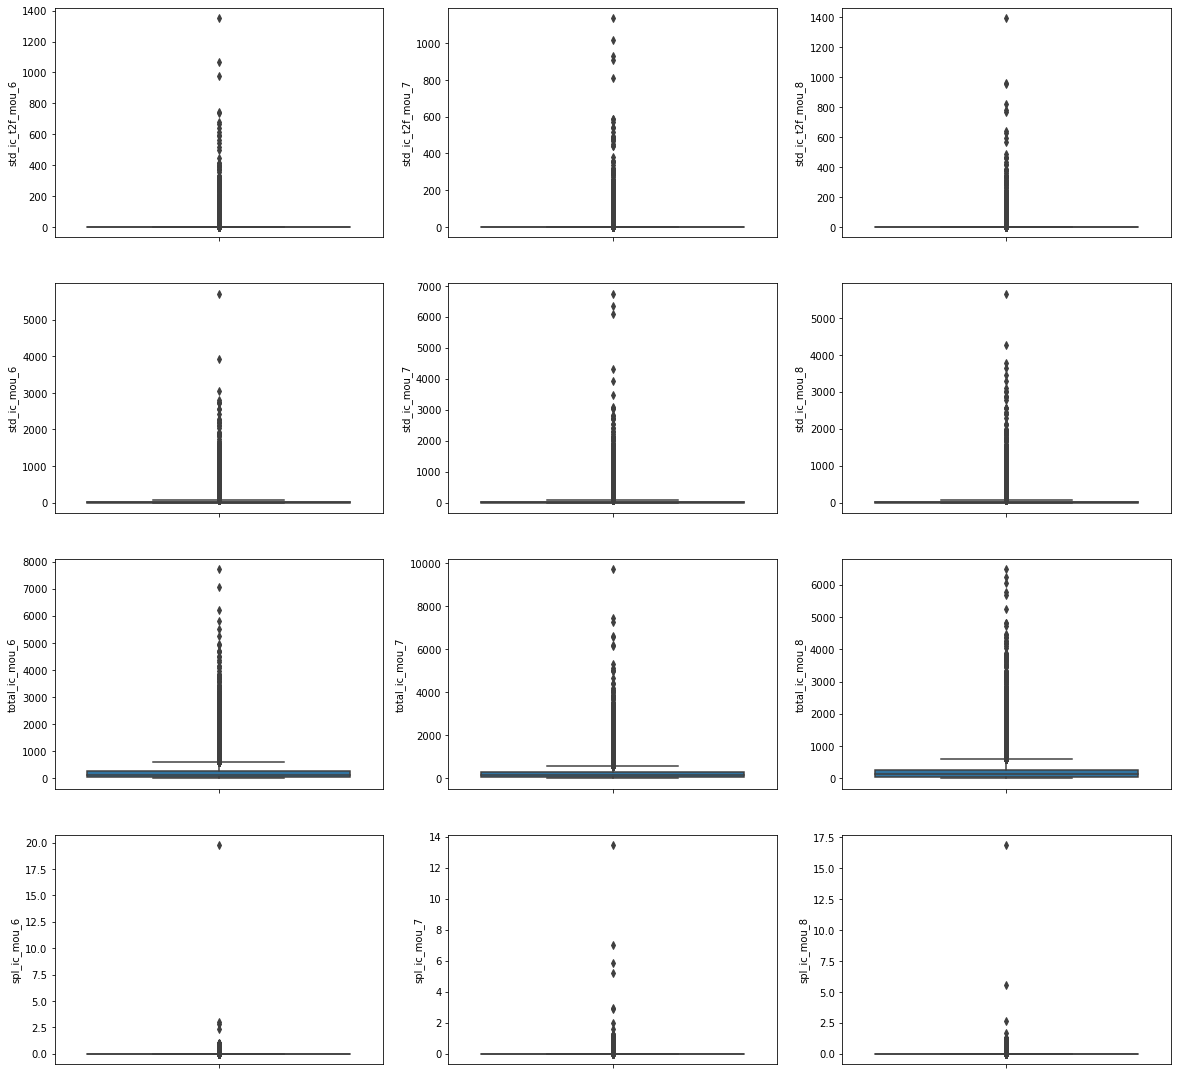

In [31]:
plt.figure(figsize=(20, 60))
i=73
while i <=84:
    plt.subplot(12,3,i-72)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

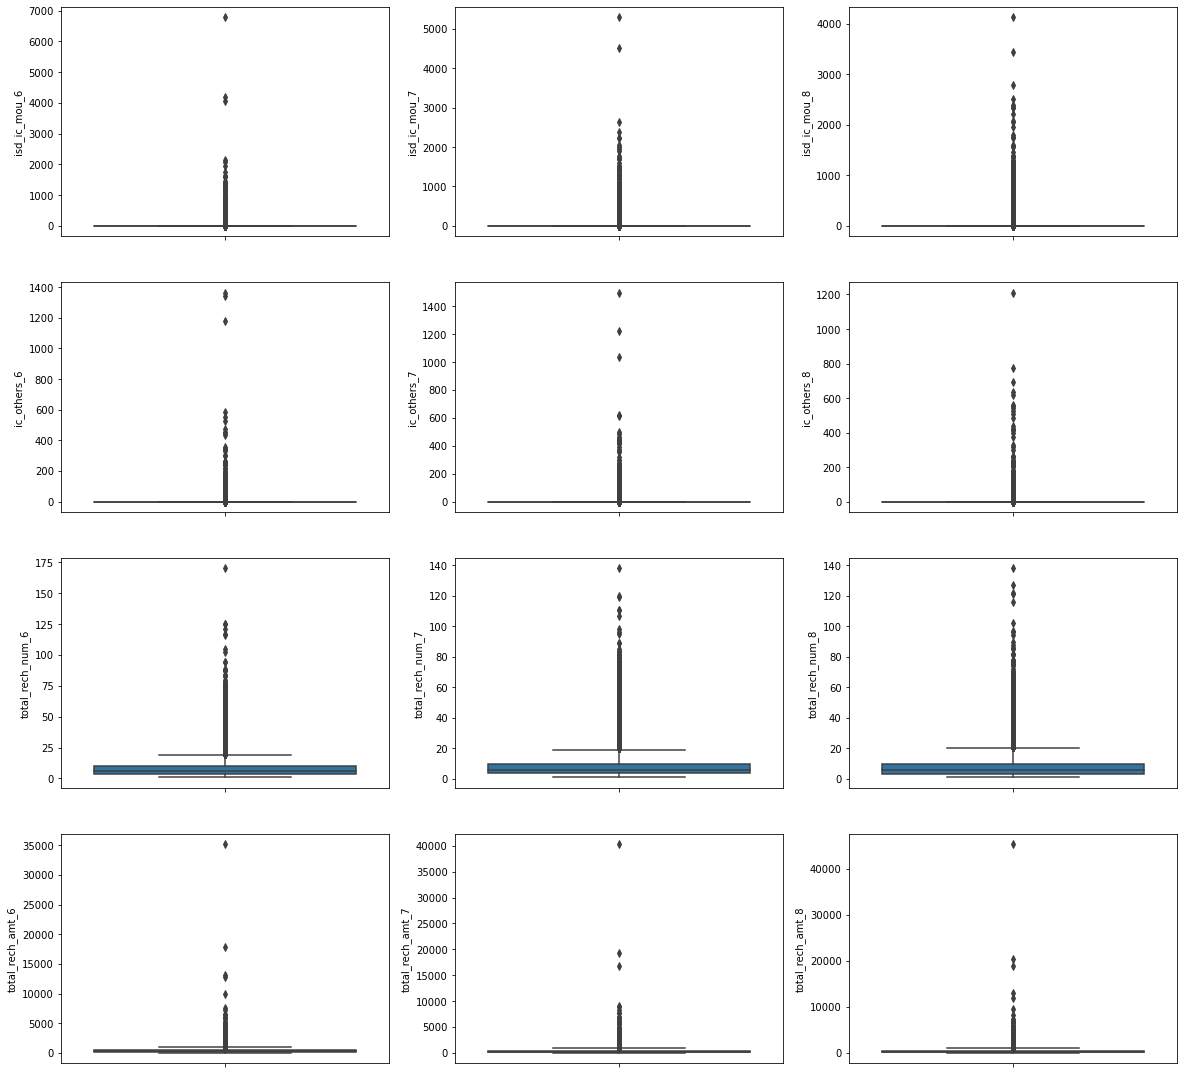

In [32]:
plt.figure(figsize=(20, 60))
i=85
while i <=96:
    plt.subplot(12,3,i-84)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

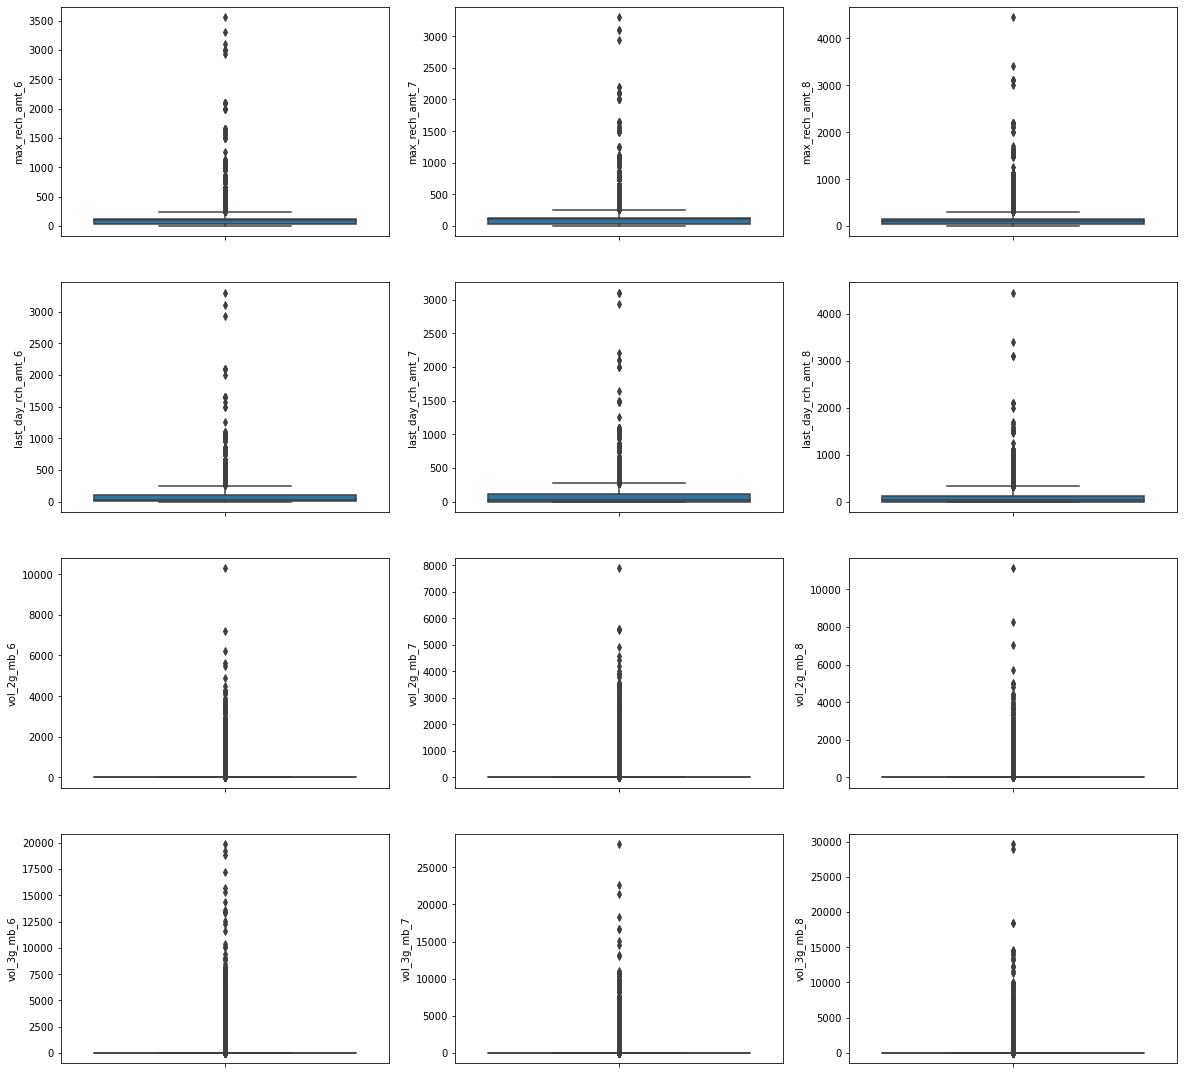

In [33]:
plt.figure(figsize=(20, 60))
i=97
while i <=108:
    plt.subplot(12,3,i-96)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

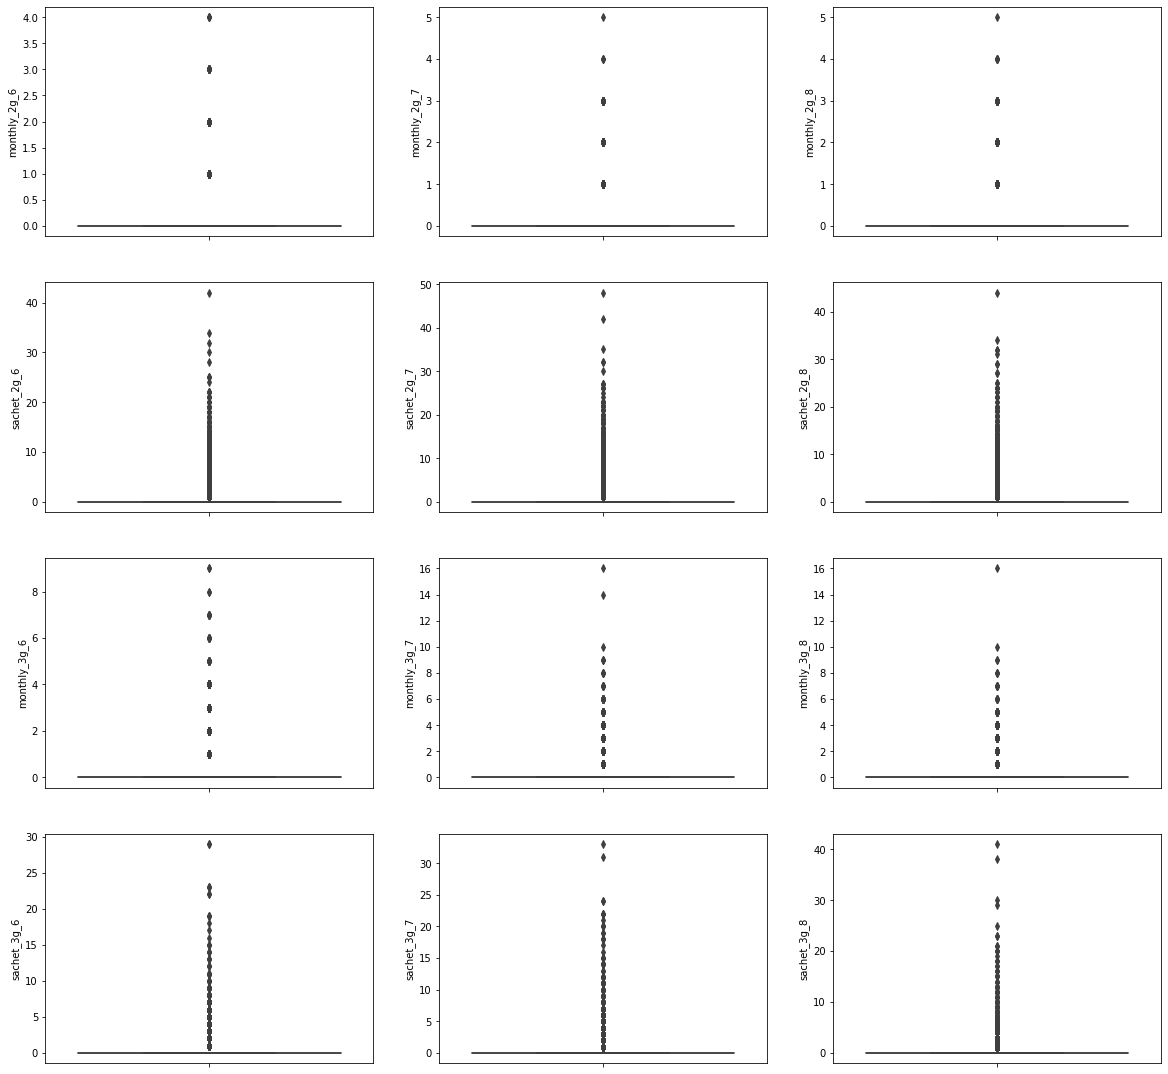

In [34]:
plt.figure(figsize=(20, 60))
i=109
while i <=120:
    plt.subplot(12,3,i-108)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()

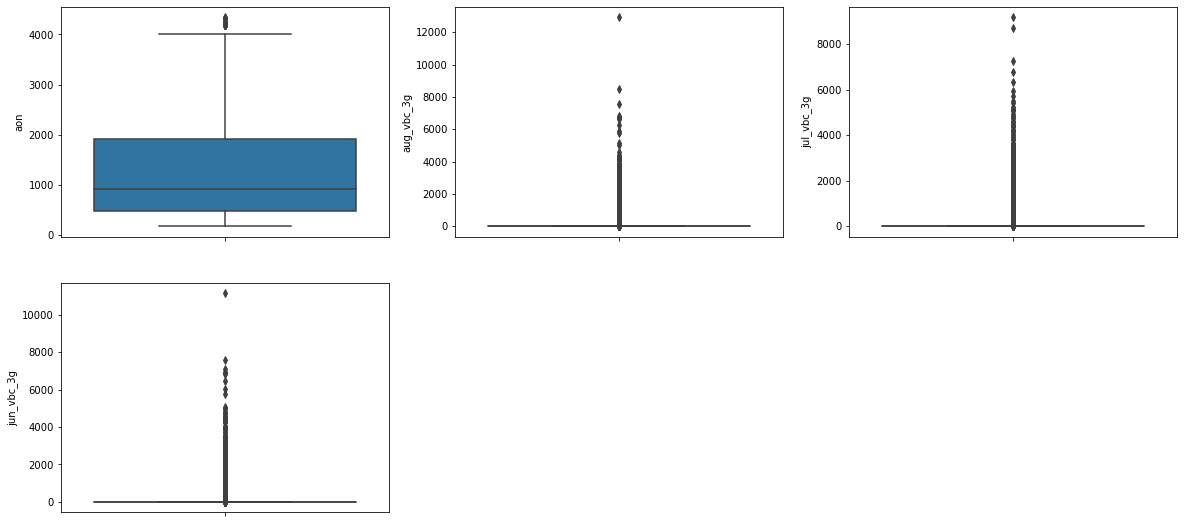

In [35]:
plt.figure(figsize=(20, 60))
i=121
while i <=124:
    plt.subplot(12,3,i-120)
    sns.boxplot(y = numerical_columns.columns[i], data = df_churn)
    i=i+1
plt.show()